In [1]:
import numpy as np
import pandas as pd
import nibabel
from numpy import linalg
import os.path as osp
import nibabel.gifti.giftiio as gio
from nibabel import gifti
import string
import copy
import os

In [2]:
from nibabel.testing import data_path

In [3]:
data = os.path.join(data_path, '/content/raw_t1_subject_02.nii')

In [4]:
import nibabel as nib
img = nib.load(data)

In [5]:
img.shape

(256, 256, 256)

In [6]:
img.get_data_dtype() == np.dtype(np.int16)

False

In [7]:
img.affine.shape

(4, 4)

In [8]:
hdr = img.header

In [9]:
hdr.get_xyzt_units()

('mm', 'sec')

In [10]:
np.set_printoptions(precision=2, suppress=True)

In [11]:
img.affine

array([[  -1.  ,   -0.  ,    0.  ,  123.77],
       [  -0.  ,    0.  ,    1.  , -102.9 ],
       [  -0.  ,   -1.  ,   -0.  ,  144.53],
       [   0.  ,    0.  ,    0.  ,    1.  ]])

In [12]:
header = img.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  0.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer Jul 21 2021'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -1.6463613e-09
quatern_c       : 0.70710677
quatern_d       : -0.70710677
qoffset_x       : 123.77157
qoffset_y       : -102.89539
qoffset_z 

In [13]:
print(header.get_zooms())

(1.0, 1.0, 1.0)


In [14]:
data = os.path.join(data_path, '/content/thickness_map_subject_01.nii')

In [15]:
import nibabel as nib
img = nib.load(data)

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
v1 = np.array([-1,1, -1])
v2 = np.array([2, 1,2])

In [18]:
dot_product = np.sum(v1 * v2)

In [19]:
print("The dot product of v1 and v2 is", dot_product )

The dot product of v1 and v2 is -3


In [20]:
n1 = np.sqrt(np.sum(v1 * v1))
n2 = np.sqrt(np.sum(v2 * v2))

print('The L2 norm of v1 is', n1)
print('The L2 norm of v2 is', n2)

The L2 norm of v1 is 1.7320508075688772
The L2 norm of v2 is 3.0


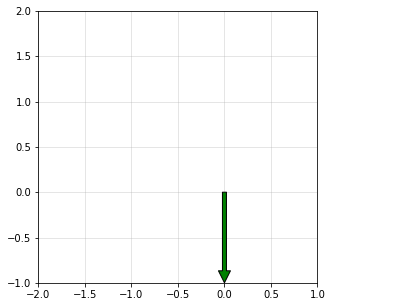

In [21]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.grid(alpha=0.4)
ax.set(xlim=(-2, 1), ylim=(-1, 2))

v1 = np.array([2,  1])
v2 = np.array([0, -1])

# Plot the orthogonal vectors Caste
ax.annotate('', xy=v1, xytext=(0, 0), arrowprops=dict(facecolor='r'))
ax.annotate('', xy=v2, xytext=(0, 0), arrowprops=dict(facecolor='g'))
plt.show()

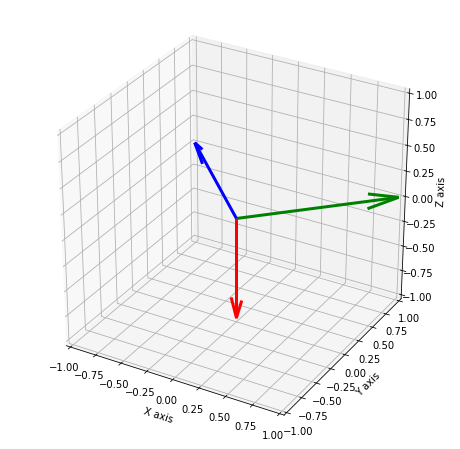

In [22]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the orthogonal vectors
v1 = np.array([ 0, 0, -1])
v2 = np.array([ 1, 1, 0])
v3 = np.array([-1, 1, 0])
 
# Plot the orthogonal vectors
ax.quiver( 0, 0, 0, v1[0], v1[1], v1[2], color = 'r', lw=3, arrow_length_ratio=0.2)
ax.quiver( 0, 0, 0, v2[0], v2[1], v2[2], color = 'g', lw=3, arrow_length_ratio=0.2)
ax.quiver( 0, 0, 0, v3[0], v3[1], v3[2], color = 'b', lw=3, arrow_length_ratio=0.2)

ax.set_xlim([-1, 1]), ax.set_ylim([-1, 1]), ax.set_zlim([-1, 1])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
plt.show()

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler
%matplotlib inline

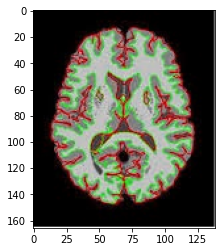

In [24]:
image = cv2.imread('/content/Cortical thickenesss.jpg')
plt.imshow(image)

In [25]:
cv2.imread('/content/Cortical thickenesss.jpg').max()

255

In [26]:
cv2.imread('/content/Cortical thickenesss.jpg').min()

0

In [27]:
def crop_brain_contour(image, plot=False):
    
    #import imutils
    #import cv2
    #from matplotlib import pyplot as plt
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image

In [28]:
import imutils

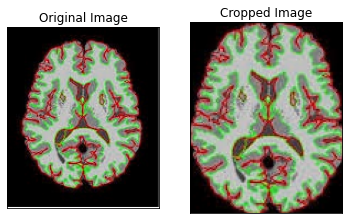

In [52]:
img = cv2.imread('/content/Cortical thickenesss.jpg')
new_img = crop_brain_contour(img, True)

In [53]:
print(img)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  1   1   1]
  [ 52  52  52]
  [244 244 244]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  1   1   1]
  [ 52  52  52]
  [244 244 244]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  1   1   1]
  [ 52  52  52]
  [244 244 244]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [ 55  55  55]
  [245 245 245]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  3   3   3]
  [ 54  54  54]
  [243 243 243]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 253 253]
  [255 255 255]
  [250 250 250]]]


In [22]:
from PIL import Image

img = Image.open('/content/thickeness image.png')
imgGray = img.convert('L')
imgGray.save('/content/Cortical grey thickenesss.jpg')

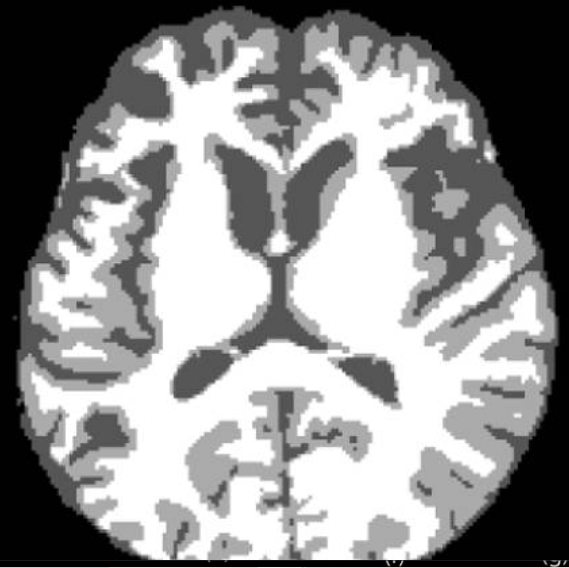

In [23]:
img

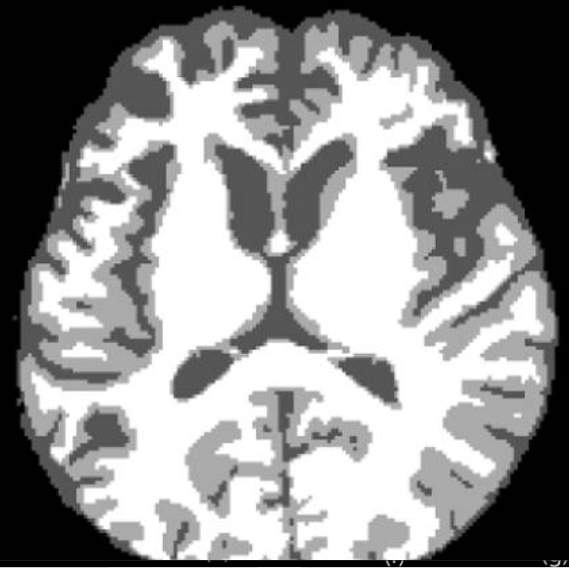

In [24]:
imgGray

In [15]:
import numpy as np
import matplotlib.pyplot as plt

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

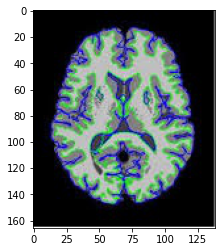

In [21]:
print(np.unique(img))
plt.imshow(img, cmap='Greys_r')